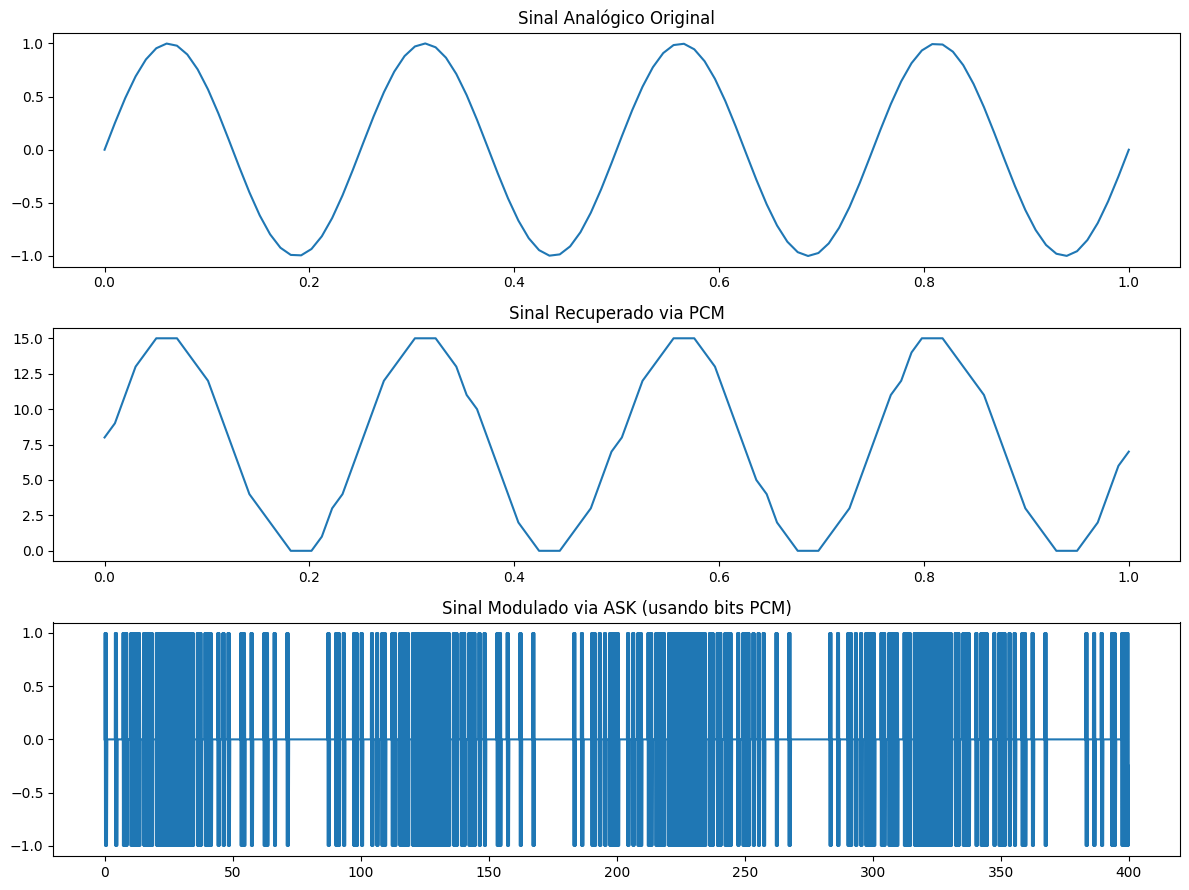

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Modulação PCM
def pcm_modulacao(sinal, n_bits):
    sinal_normalizado = (sinal - sinal.min()) / (sinal.max() - sinal.min())  # Normaliza o sinal
    quantizado = np.round(sinal_normalizado * (2**n_bits - 1))  # Quantização
    return quantizado.astype(int)

# Converte o sinal PCM modulado em uma sequência de bits
def pcm_para_bits(sinal_quantizado, n_bits):
    bits = np.unpackbits(sinal_quantizado.astype(np.uint8))
    bits = bits.reshape(-1, 8)[:, 8-n_bits:]  # Ajusta o número de bits
    return bits.flatten()

# Modulação ASK
def ask_modulacao(bits, f_portadora, fs):
    t = np.arange(len(bits) * fs) / fs
    portadora = np.sin(2 * np.pi * f_portadora * t)
    modulado = np.repeat(bits, fs) * portadora
    return modulado

# Geração do sinal de entrada analógico (senoide)
fs = 100  # Frequência de amostragem
f = 4  # Frequência do sinal
t = np.linspace(0, 1, fs)
sinal_analogico = np.sin(2 * np.pi * f * t)

pcm_bits = 4
pcm_modulado = pcm_modulacao(sinal_analogico, pcm_bits)
bits_pcm = pcm_para_bits(pcm_modulado, pcm_bits)
ask_modulado = ask_modulacao(bits_pcm, f, fs)

# Resultados Gráficos
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t, sinal_analogico)
plt.title('Sinal Analógico Original')

plt.subplot(3, 1, 2)
plt.plot(t, pcm_modulado)
plt.title('Sinal Recuperado via PCM')

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(ask_modulado)) / fs, ask_modulado)
plt.title('Sinal Modulado via ASK (usando bits PCM)')

plt.tight_layout()
plt.show()